In [88]:
from sklearn.utils import resample
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Import Data

In [68]:
df_car=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df_car.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [69]:
df_car.shape

(194673, 38)

# Data Cleaning and Preparation

In [70]:
df_group_one = df_car[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df_group_one.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [71]:
df_group_one.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [72]:
df_group_one[["WEATHER", "ROADCOND",'LIGHTCOND']] = df_group_one[["WEATHER", "ROADCOND",'LIGHTCOND']].astype("category")

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
df_group_one.dtypes

SEVERITYCODE       int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
dtype: object

In [73]:
df_group_one['WEATHERCAT']= df_group_one["WEATHER"].cat.codes
df_group_one['ROADCONDCAT']= df_group_one["ROADCOND"].cat.codes
df_group_one['LIGHTCONDCAT']= df_group_one["LIGHTCOND"].cat.codes
df_group_one.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHERCAT,ROADCONDCAT,LIGHTCONDCAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [74]:
df_group_one.dtypes

SEVERITYCODE       int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
WEATHERCAT          int8
ROADCONDCAT         int8
LIGHTCONDCAT        int8
dtype: object

# Balance Data

In [75]:
df_group_one['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [77]:
df_majority = df_group_one[df_group_one.SEVERITYCODE==1]
df_minority = df_group_one[df_group_one.SEVERITYCODE==2]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=78297) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.SEVERITYCODE.value_counts()


2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

# Modeling

## define X and Y

In [81]:
x = np.asarray(df_downsampled[['WEATHERCAT','ROADCONDCAT','LIGHTCONDCAT']])
x[0:5]

array([[ 4,  0,  5],
       [ 4,  0,  5],
       [ 4,  0,  2],
       [10,  7,  8],
       [ 1,  0,  2]], dtype=int8)

In [82]:
y = np.asarray(df_downsampled['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1])

## Data Normalization

In [84]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.42098414, -0.67116537,  0.42636181],
       [ 0.42098414, -0.67116537,  0.42636181],
       [ 0.42098414, -0.67116537, -1.225232  ],
       [ 2.61451227,  1.25327511,  2.07795562],
       [-0.67577992, -0.67116537, -1.225232  ]])

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print('Train set:',x_train.shape,y_train.shape)
print('Test set:',x_test.shape,y_test.shape)

Train set: (93100, 3) (93100,)
Test set: (23276, 3) (23276,)


## KNN

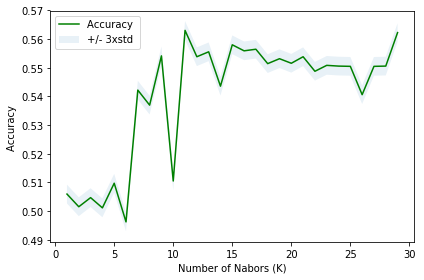

The best accuracy was with 0.563026293177522 with k= 11


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

In [127]:
k =11
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [128]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([2, 2, 2, 2, 2])

In [129]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5601611170784103
Test set Accuracy:  0.563026293177522


## Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
accidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
accidentTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
accidentTree.fit(x_train,y_train)
predTree = accidentTree.predict(x_test)
print (predTree [0:10])
print (y_test [0:10])


[2 2 2 2 2 1 2 1 2 2]
[2 2 1 1 1 2 1 1 1 1]


## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=6, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
yhat = LR.predict(x_test)
yhat

array([1, 2, 2, ..., 2, 2, 2])

In [142]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.573691  , 0.426309  ],
       [0.47157777, 0.52842223],
       [0.47157777, 0.52842223],
       ...,
       [0.47157777, 0.52842223],
       [0.46167199, 0.53832801],
       [0.47157777, 0.52842223]])

# Evaluation

KNN

In [136]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss# predicted y
yhat_knn = neigh.predict(x_test)

# jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.563026293177522
KNN F1-score:  0.5471223872325656


Decision Tree

In [138]:
# predicted y
yhat_dt = accidentTree.predict(x_test)

# jaccard
jaccard_dt = jaccard_similarity_score(y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.5628544423440454
DT F1-score:  0.5347732983835123


Logistic Regression

In [143]:
# predicted y
yhat_lg = LR.predict(x_test)
yhat_lg_prob = LR.predict_proba(x_test)

# jaccard
jaccard_lg = jaccard_similarity_score(y_test, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)

# f1_score
f1_score_lg = f1_score(y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)

# logloss
logloss_lg = log_loss(y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.5243598556452999
LR F1-score:  0.5091466260926107
LR log loss:  0.6856325273218654


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [ ]:
| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.56302       | 0.547122        | NA      |
| Decision Tree      | 0.56285       | 0.534773        | NA      |
| LogisticRegression | 0.52435       | 0.509146        | 0.68563     |